<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Natural Language Processing - Airline Customer Review Sentiment Analysis</center></h1>

<center><img src="https://images.pexels.com/photos/3769532/pexels-photo-3769532.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="1300" height="500"></center>

<center><font size=6> Airline Customer Review Sentiment Analysis </font></center>

## Problem Statement

### Business Context

In today's digital age, social media platforms like Twitter have become a prominent channel for customers to share their experiences and opinions, and the airline industry is no exception. Passengers frequently turn to Twitter to express their thoughts, feelings, and experiences related to their air travel. The ease of access and immediacy of social media has empowered customers to voice their opinions in real-time, making it a valuable source of feedback for airlines. The airline company recognized the immense value of these insights to understand customer sentiment and continuously enhance the travel experience.

However, the airline company faces a significant challenge with the rise of negative feedback on social media. Negative sentiments expressed by customers become a crucial problem to solve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and ultimately result in passengers choosing competitors for their future travel needs. This translates to a loss of loyal customers, impacting long-term revenue and market share.

2. Reputation Damage: Persistent negative sentiment, if left unmanaged, can tarnish an airline's reputation, and influence potential passengers to avoid booking with the airline. A damaged reputation can have lasting consequences, affecting brand loyalty and trust.

3. Financial Loss: Loss of revenue can occur if negative sentiment drives passengers away, impacting the airline's profitability and long-term success. Negative feedback can discourage potential passengers from making bookings with the airline, leading to direct financial repercussions

### Problem Definition

The airline has noticed a trend as it grew - the amount of feedback coming through conventional channels (airline feedback forms, surveys, etc.) has reduced and customers have started sharing their feedback by tagging the airline's official social media handles. The volume of feedback being received on social media has significantly increased (~25%) over the past six months. In particular, the official Twitter handle of the airline saw a 50% increase in mentions. While they were initially tracking the social media feedback manually, the recent increase in volume has made it difficult to continue the same. This has prompted the airline to seek an AI-based solution to analyze the feedback provided by customers on social media. They believe that such a solution will be more effective than their current methods and provide insights that can proactively help them minimize revenue loss. As a first step, they want to start by assessing the feedback provided by customers on social media and categorizing the sentiment of the customer as negative, positive, or neutral.

As a Data Scientist on the airline's Data Team, you are provided with the tweets shared by customers regarding their experience with the airline's services. The objective is to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing the necessary libraries

In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report,make_scorer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Loading the dataset

In [3]:
# loading the dataset
df = pd.read_csv('/content/US_Airways.csv')

In [4]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [5]:
# Print first 5 rows of data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570310600460525568,negative,0.6292,Flight Booking Problems,0.3146,US Airways,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2015-02-24 11:53:37 -0800,NaN,NaN
1,570310144459972608,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2015-02-24 11:51:48 -0800,NaN,Atlantic Time (Canada)
2,570309340952993796,neutral,1.0000,NaN,NaN,US Airways,NaN,DebbiMcGinnis,NaN,0,@USAirways is a DM possible if you aren't foll...,NaN,2015-02-24 11:48:37 -0800,Missourah,Hawaii
3,570309000279023616,neutral,1.0000,NaN,NaN,US Airways,NaN,AshleyKAtherton,NaN,0,@USAirways Fortunately you have staff like Lyn...,NaN,2015-02-24 11:47:16 -0800,NaN,Central Time (US & Canada)
4,570308799950692353,negative,1.0000,Customer Service Issue,0.6452,US Airways,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2015-02-24 11:46:28 -0800,NaN,NaN


In [6]:
# checking a customer review
data['text'][3]

'@USAirways Fortunately you have staff like Lynn S. and DeeDee who actually understand customer service and simply being NICE.'

### Checking the shape of the dataset

In [7]:
# print shape of data
data.shape

(2913, 15)

* The data comprises of ~3k customer reviews

### Checking for Missing Values

In [8]:
# Check for NULL values
data.isnull().sum(axis=0)

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                   650
negativereason_confidence        443
airline                            0
airline_sentiment_gold          2910
name                               0
negativereason_gold             2911
retweet_count                      0
text                               0
tweet_coord                     2763
tweet_created                      0
tweet_location                  1069
user_timezone                   1062
dtype: int64

In this dataset, our main focus is on two columns, namely 'content' and 'sentiment.' Fortunately, these columns do not contain any missing values. As a result, there is no need to address missing values in other columns.

### Checking the statistical summary

In [9]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,2.913000e+03,2913.000000,2470.000000,2913.000000
mean,5.691208e+17,0.921578,0.687172,0.085479
std,7.676358e+14,0.149996,0.307860,1.172269
min,5.676433e+17,0.340000,0.000000,0.000000
25%,5.684797e+17,1.000000,0.622350,0.000000
50%,5.693176e+17,1.000000,0.677700,0.000000
75%,5.697157e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


- `tweet_id` is a unique ID for a tweet, so we can discard it from our analysis
- We see that there is minimal retweeting of customers tweets
    - However, this might vary by customer sentiment, so we'll check for that later

## Exploratory Data Analysis (EDA)


In [10]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of sentiments

<ipython-input-10-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


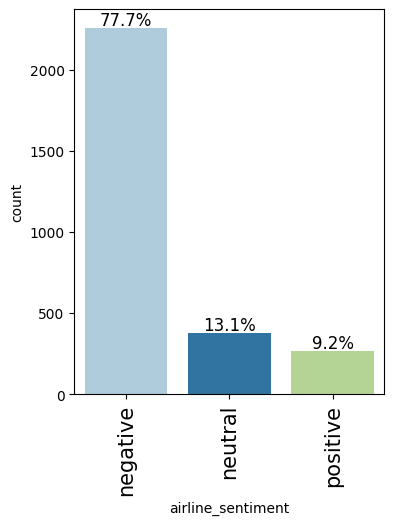

In [11]:
labeled_barplot(data, "airline_sentiment", perc=True)

- Majority of the tweets are negative (78%), followed by neutral tweets (13%), and then the positive tweets (9%)

#### Distribution of negative sentiment reasons

<ipython-input-10-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


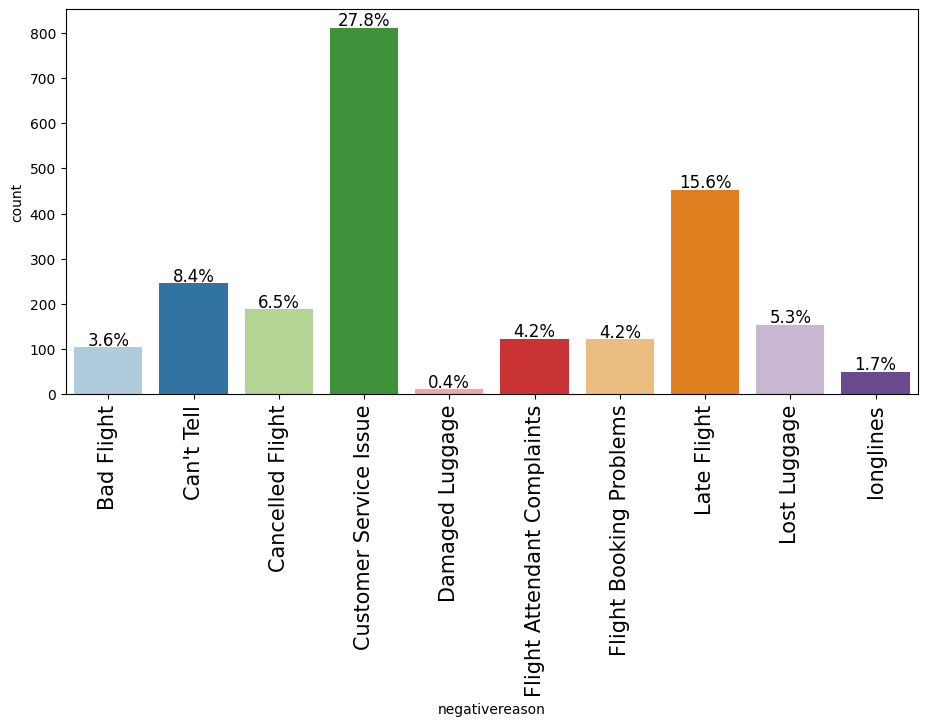

In [12]:
labeled_barplot(data, "negativereason", perc=True)

* The predominant causes of negative tweets appear to be customer service issues (28%) and late flights (16%)

#### Distribution of retweets

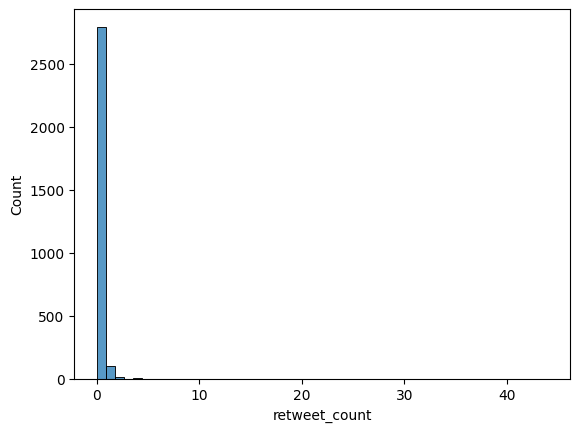

In [13]:
sns.histplot(data, x='retweet_count', bins =50);

- A majority of the customer tweets are not re-tweeted
- The lower number of retweet counts suggests that customers are less inclined to retweet

### Bivariate Analysis

Let's check the relationship between retweets and customer sentiment

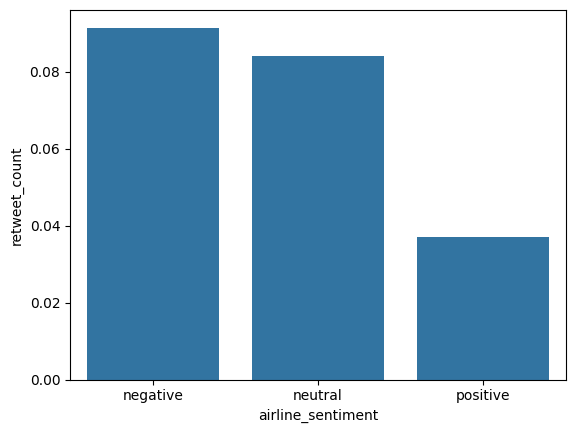

In [14]:
sns.barplot(data, y='retweet_count', x='airline_sentiment', errorbar=('ci', False));

* On average, negative sentiment tweets get re-tweeted the most

## Text Preprocessing

### Removing special characters from the text

In [15]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [16]:
# Applying the function to remove special characters
data['cleaned_text'] = data['text'].apply(remove_special_characters)

In [17]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['text','cleaned_text']]

,text,cleaned_text
0,@USAirways is there a better time to call? My...,USAirways is there a better time to call My f...
1,@USAirways and when will one of these agents b...,USAirways and when will one of these agents b...
2,@USAirways is a DM possible if you aren't foll...,USAirways is a DM possible if you aren t foll...
3,@USAirways Fortunately you have staff like Lyn...,USAirways Fortunately you have staff like Lyn...


- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [18]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [19]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['text','cleaned_text']]

,text,cleaned_text
0,@USAirways is there a better time to call? My...,usairways is there a better time to call my f...
1,@USAirways and when will one of these agents b...,usairways and when will one of these agents b...
2,@USAirways is a DM possible if you aren't foll...,usairways is a dm possible if you aren t foll...
3,@USAirways Fortunately you have staff like Lyn...,usairways fortunately you have staff like lyn...


- We can observe that all the text has now successfully been converted to lower case.

### Removing extra whitespace

In [20]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [21]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['text','cleaned_text']]

,text,cleaned_text
0,@USAirways is there a better time to call? My...,usairways is there a better time to call my fl...
1,@USAirways and when will one of these agents b...,usairways and when will one of these agents be...
2,@USAirways is a DM possible if you aren't foll...,usairways is a dm possible if you aren t follo...
3,@USAirways Fortunately you have staff like Lyn...,usairways fortunately you have staff like lynn...


### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [22]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [23]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [24]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,usairways is there a better time to call my fl...,usairways better time call flight friday need ...
1,usairways and when will one of these agents be...,usairways one agents available speak
2,usairways is a dm possible if you aren t follo...,usairways dm possible following
3,usairways fortunately you have staff like lynn...,usairways fortunately staff like lynn deedee a...


* We observe that all the stopwords have been removed.

### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [25]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [26]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [27]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [28]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,usairways better time call flight friday need ...,usairway better time call flight friday need c...
1,usairways one agents available speak,usairway one agent avail speak
2,usairways dm possible following,usairway dm possibl follow


## Text Vectorization

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [29]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(2913, 1000)

In [30]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [31]:
# Checking the words considered by BoW model
words

array(['000', '10', '100', '11', '12', '13', '14', '15', '150', '16',
       '18', '19', '1hr', '1st', '20', '200', '21', '22', '23', '24',
       '25', '28', '2hr', '2nd', '2x', '30', '30pm', '3rd', '40', '428',
       '4322', '45', '50', '60', '680', '699', '719', '728', '75', '800',
       '8pm', '90', 'aa', 'aadvantag', 'abl', 'absolut', 'abysm',
       'accept', 'access', 'accommod', 'account', 'acct', 'action',
       'actual', 'ad', 'add', 'addit', 'address', 'admir', 'advantag',
       'advisori', 'affect', 'afford', 'afternoon', 'agenc', 'agent',
       'ago', 'ahead', 'air', 'airlin', 'airplan', 'airport', 'airway',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amaz', 'american', 'americanair', 'amount', 'amp', 'angri',
       'announc', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth',
       'anyway', 'anywher', 'apolog', 'app', 'appar', 'appli', 'appreci',
       'area', 'argu', 'around', 'arriv', 'asap', 'ask', 'assign',
       'ass

In [56]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,10,100,11,12,13,14,15,150,16,...,ye,yeah,year,yell,yep,yesterday,yet,yr,yuma,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
_df_0['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['agent'].plot(kind='hist', bins=20, title='agent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['anoth'].plot(kind='hist', bins=20, title='anoth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['avail'].plot(kind='hist', bins=20, title='avail')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='actual', y='agent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='agent', y='anoth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='anoth', y='avail', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='avail', y='award', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['actual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('actual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['agent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('agent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['avail']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('avail')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['better']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('better')

from matplotlib import pyplot as plt
_df_12['actual'].plot(kind='line', figsize=(8, 4), title='actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['agent'].plot(kind='line', figsize=(8, 4), title='agent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['anoth'].plot(kind='line', figsize=(8, 4), title='anoth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['avail'].plot(kind='line', figsize=(8, 4), title='avail')
plt.gca().spines[['top', 'right']].set_visible(False)

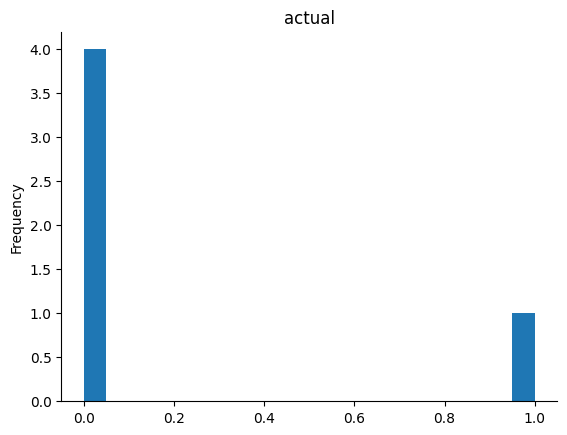

In [57]:
from matplotlib import pyplot as plt
_df_0['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: summarize df_BOW finding

The `df_BOW` DataFrame contains the bag-of-words representation of the text data, where each row corresponds to a tweet and each column represents a word from the vocabulary of the top 1000 most frequent words. The values in the DataFrame represent the count of each word in the corresponding tweet. This representation allows us to analyze the frequency of words in the tweets and use this information for tasks such as sentiment analysis and topic modeling.


## Splitting the dataset

In [33]:
# Creating dependent and independent variables
X = df_BOW
y = data['airline_sentiment']

In [34]:
from sklearn.model_selection import train_test_split

# Initial split into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [35]:
X_train.shape, X_test.shape, X_valid.shape

((2330, 1000), (292, 1000), (291, 1000))

In [36]:
# Instantiate a LabelEncoder to encode categorical labels into numerical values
encoder = LabelEncoder()

# Create DataFrames for training, validation, and testing sets
# Encoding the target variable and adding it to the respective DataFrames
# Resetting index for consistency in DataFrames

# Training set
ds_train = pd.DataFrame(data=X_train, columns=['text'])
ds_train['target'] =  encoder.fit_transform(y_train)
ds_train = ds_train.reset_index(drop=True)

# # Validation set
ds_valid = pd.DataFrame(data=X_valid, columns=['text'])
ds_valid['target'] =  encoder.transform(y_valid)
ds_valid = ds_valid.reset_index(drop=True)

# # Testing set
ds_test = pd.DataFrame(data=X_test, columns=['text'])
ds_test['target'] =  encoder.transform(y_test)
ds_test = ds_test.reset_index(drop=True)

## Model Building

In [37]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Random Forest Model (default with BOW)

In [39]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

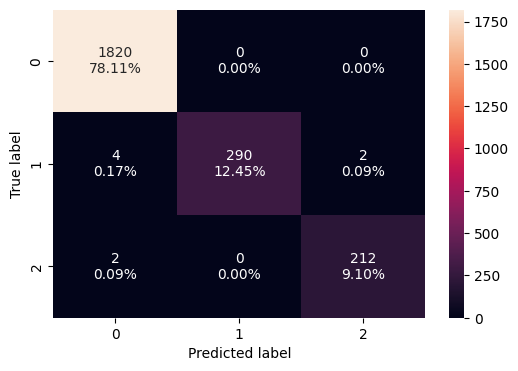

In [40]:
confusion_matrix_sklearn(rf_bow, X_train, y_train)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

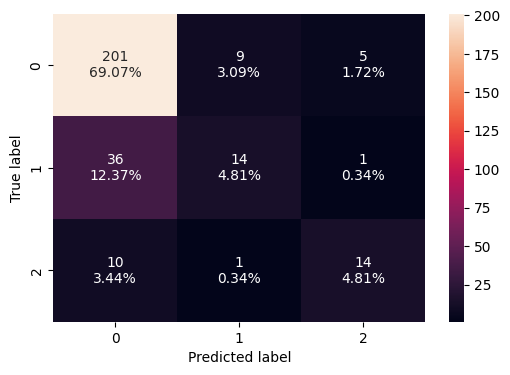

In [41]:
confusion_matrix_sklearn(rf_bow, X_valid, y_valid)

In [42]:
# Predicting on train data
y_pred_train = rf_bow.predict(X_train)

# Predicting on validation data
y_pred_valid = rf_bow.predict(X_valid)

**Classification report**

In [43]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1820
     neutral       1.00      0.98      0.99       296
    positive       0.99      0.99      0.99       214

    accuracy                           1.00      2330
   macro avg       1.00      0.99      0.99      2330
weighted avg       1.00      1.00      1.00      2330



In [44]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87       215
     neutral       0.58      0.27      0.37        51
    positive       0.70      0.56      0.62        25

    accuracy                           0.79       291
   macro avg       0.70      0.59      0.62       291
weighted avg       0.76      0.79      0.76       291



- The model achieved an 79% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







In [45]:
rf_train_perf = model_performance_classification_sklearn(
    rf_bow, X_train, y_train
)

In [46]:
rf_valid_perf = model_performance_classification_sklearn(
    rf_bow, X_valid, y_valid
)

### Random Forest (with class_weights and BOW)

In [47]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

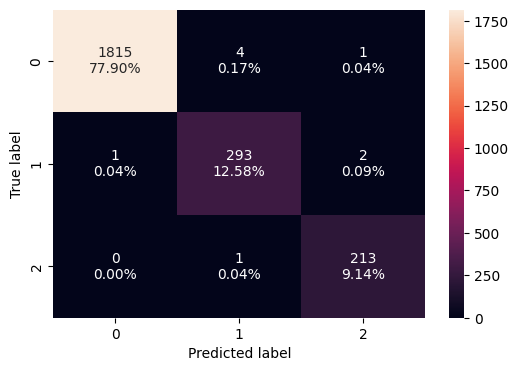

In [48]:
confusion_matrix_sklearn(rf_bow_balanced, X_train, y_train)

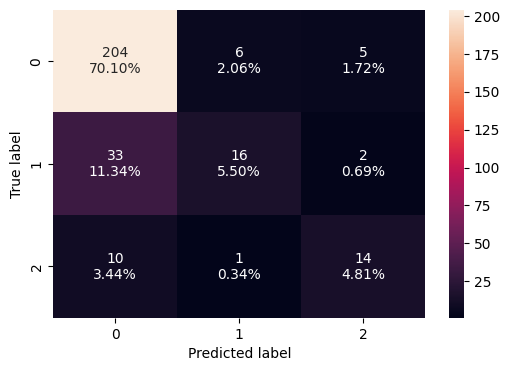

In [49]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid, y_valid)

In [50]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid)

**Classification report**

In [51]:
print(classification_report(y_train, y_pred_train_bow))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1820
     neutral       0.98      0.99      0.99       296
    positive       0.99      1.00      0.99       214

    accuracy                           1.00      2330
   macro avg       0.99      0.99      0.99      2330
weighted avg       1.00      1.00      1.00      2330



In [52]:
print(classification_report(y_valid, y_pred_valid_bow))

              precision    recall  f1-score   support

    negative       0.83      0.95      0.88       215
     neutral       0.70      0.31      0.43        51
    positive       0.67      0.56      0.61        25

    accuracy                           0.80       291
   macro avg       0.73      0.61      0.64       291
weighted avg       0.79      0.80      0.78       291



- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







In [53]:
rf_bal_train_perf = model_performance_classification_sklearn(
    rf_bow_balanced, X_train, y_train
)

In [54]:
rf_bal_valid_perf = model_performance_classification_sklearn(
    rf_bow_balanced, X_valid, y_valid
)

### Random Forest (with hyperparamter tuning and BOW)

In [55]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 10, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = make_scorer(recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Creating a new model with the best combination of parameters
rf_bow_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_bow_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=6, n_estimators=80, random_state=42)

**Confusion Matrix**

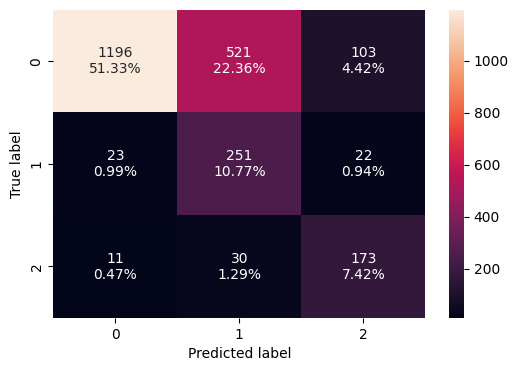

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_train, y_train)

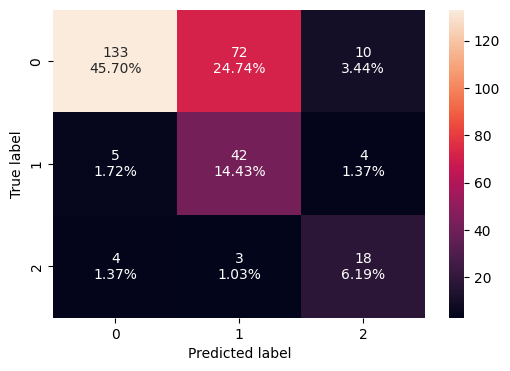

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_valid, y_valid)

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow_tuned.predict(X_train)

# Predicting on validation data
y_pred_valid_bow = rf_bow_tuned.predict(X_valid)

**Classification report**

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1820
     neutral       1.00      0.98      0.99       296
    positive       0.99      0.99      0.99       214

    accuracy                           1.00      2330
   macro avg       1.00      0.99      0.99      2330
weighted avg       1.00      1.00      1.00      2330



In [ ]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87       215
     neutral       0.58      0.27      0.37        51
    positive       0.70      0.56      0.62        25

    accuracy                           0.79       291
   macro avg       0.70      0.59      0.62       291
weighted avg       0.76      0.79      0.76       291



In [ ]:
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_bow_tuned, X_train, y_train
)

In [ ]:
rf_tuned_valid_perf = model_performance_classification_sklearn(
    rf_bow_tuned, X_valid, y_valid
)

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_bal_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned)
Accuracy,0.996567,0.996137,0.695279
Recall,0.996567,0.996137,0.695279
Precision,0.996575,0.996163,0.852603
F1,0.996555,0.996146,0.732749


In [ ]:
# validation set performance comparison

models_valid_comp_df = pd.concat(
    [
        rf_valid_perf.T,
        rf_bal_valid_perf.T,
        rf_tuned_valid_perf.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)"
]
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned)
Accuracy,0.786942,0.804124,0.663230
Recall,0.786942,0.804124,0.663230
Precision,0.763607,0.789401,0.803242
F1,0.761765,0.780555,0.692390


- **Observation**: The recall score difference between the train and validation sets is notably lower for the random forest model with class_weights and also the validation score is higher compared to other models.

- **Conclusion**: Hence, we select this model as the best option since a lower difference suggests improved consistency and generalization across both training and validation datasets.

## Model Testing

We'll check the performance of the Random Forest model with class_weights on the test set.

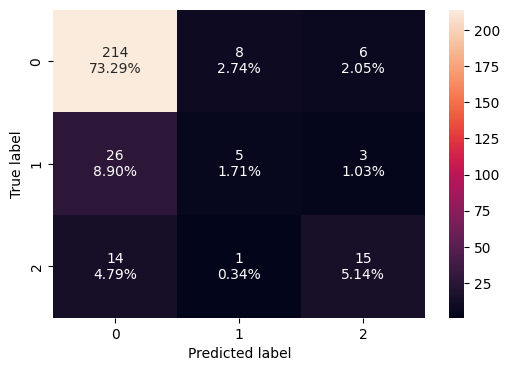

In [ ]:
confusion_matrix_sklearn(rf_bow_balanced, X_test, y_test)

In [ ]:
# Predicting on test data
y_pred_test = rf_bow_balanced.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    negative       0.84      0.94      0.89       228
     neutral       0.36      0.15      0.21        34
    positive       0.62      0.50      0.56        30

    accuracy                           0.80       292
   macro avg       0.61      0.53      0.55       292
weighted avg       0.76      0.80      0.77       292



- The model achieved a recall of 80% on the test dataset.

## Conclusion

- We analyzed the distribution of the sentiment of the reviews.

- We used different text processing techniques to clean the raw text data.

- We then built an ML model (Random Forest with class_weights) with the vectorized data.

- The Random Forest model was able to achieve a recall score of 80% on the test dataset.
    - The model can be tuned further or a different model can be trained to model the data better.

- By pinpointing areas of improvement or concerns raised by customers based on the predictions of the model, the organization can take swift and targeted actions to address issues, minimizing the risk of revenue loss and bolstering customer satisfaction.

<font size=6 color='blue'>Power Ahead</font>
___